In [2]:
import statsmodels as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
cars2_data = pd.read_csv('cars2.csv')
cars2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   car_ID      205 non-null    int64 
 1   Make        205 non-null    object
 2   region      205 non-null    object
 3   Model       205 non-null    object
 4   carbody     205 non-null    object
 5   wheelbase   205 non-null    int64 
 6   curbweight  205 non-null    int64 
 7   eng_sz      205 non-null    int64 
 8   hp          205 non-null    int64 
 9   hwy_mpg     205 non-null    int64 
 10  price       205 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 17.7+ KB


In [6]:
cars2_data = cars2_data.set_index('car_ID')

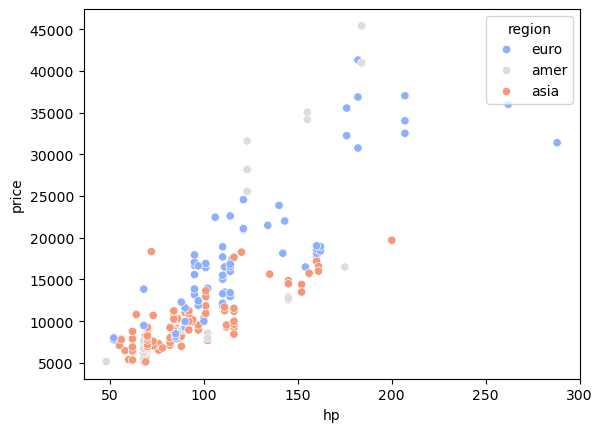

In [44]:
sns.scatterplot(data=cars2_data, x='hp', y='price', hue='region', palette='coolwarm')
plt.show()

In [16]:
numeric_cols = ['wheelbase', 'curbweight', 'eng_sz', 'hp', 'hwympg','price']

In [18]:
cars2_data[numeric_cols] = cars2_data[['wheelbase', 'curbweight', 'eng_sz', 'hp', 'hwy_mpg', 'price']]

In [24]:
# Create a correlation matrix for numeric variables in the cars dataset
cars2_corr_matrix = cars2_data[numeric_cols].corr()
print(cars2_corr_matrix)

            wheelbase  curbweight    eng_sz        hp    hwympg     price
wheelbase    1.000000    0.774049  0.571123  0.350510 -0.540187  0.584176
curbweight   0.774049    1.000000  0.850594  0.750739 -0.797465  0.835304
eng_sz       0.571123    0.850594  1.000000  0.809769 -0.677470  0.874145
hp           0.350510    0.750739  0.809769  1.000000 -0.770544  0.808139
hwympg      -0.540187   -0.797465 -0.677470 -0.770544  1.000000 -0.697598
price        0.584176    0.835304  0.874145  0.808139 -0.697598  1.000000


<Axes: >

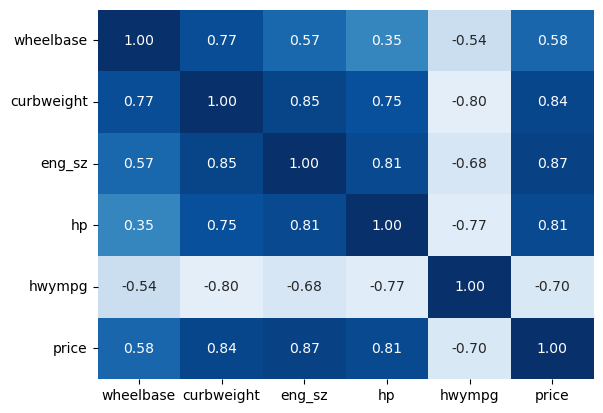

In [33]:
sns.heatmap(data=cars2_data[numeric_cols].corr(), annot=True, cmap='Blues', vmin=-1.0, vmax=1.0, cbar=False, fmt='.2f')

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(
    cars2_data[['eng_sz','curbweight']], cars2_data[['price']], 
    test_size=0.20, random_state=20)

model = LinearRegression()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.758103922359153

In [60]:
y_pred = model.predict(x_test)

In [64]:
# create the DataFrame for the price predictions
predicted = pd.DataFrame(y_pred, columns=['pred_price'])

# combine the test data and the predicted data into a DataFrame
all_cars2_data = predicted.join([x_test.reset_index(drop=True), 
                        y_test.reset_index(drop=True)])
all_cars2_data.head()[['eng_sz','curbweight','price','pred_price']]

,eng_sz,curbweight,price,pred_price
0,136,2507,15250,14186.978196
1,90,1874,8917,5681.252492
2,92,3110,8778,12256.105508
3,203,3366,31401,26252.385123
4,92,2015,6488,6633.730852


In [66]:
import statsmodels.api as sm

In [69]:
X = cars2_data[['curbweight', 'eng_sz', 'hwy_mpg']]
y = cars2_data['price']

In [71]:
X = sm.add_constant(X) 

In [73]:
model = sm.OLS(y, X) 
results = model.fit() 

In [75]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     263.7
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           2.12e-69
Time:                        18:17:20   Log-Likelihood:                -1968.8
No. Observations:                 205   AIC:                             3946.
Df Residuals:                     201   BIC:                             3959.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8263.7119   3785.239     -2.183      0.0